In [ ]:
import os
print(os.path.exists('/content/drive/MyDrive/actordata'))

True


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/

'22-07-2024 Attendence Report.gsheet'
'2. M.Tech_Intership_syllabus_2023Admission_V1.docx'
'3rd Module -Notes BMC.gdoc'
'5TH MODULE PPT.gslides'
'abhijith excel project.xlsx'
 actordata
 actors
'AI and ML Full Notes.pdf'
'AI&ML Answer Key For Second Semester MDC Examination-April 2025.gdoc'
'AI & ML BMC Question Bank.gdoc'
'AI & ML - BMC  Second Sem Supplementary Exam Answer Key.gdoc'
'AI & ML Model Examination  October 2024.gdoc'
' AI&ML Question and Answer For BMC.gdoc'
'AI & ML  Question Paper For First Internal BMC(SEM 2).docx'
'Aksa Python Notes .gdoc'
 ANN_Iris.ipynb
'Answer Key For BMC First Sem( Python for data science and ML from basics to advanced)AI&ML.gdoc'
 Array.gdoc
'Arts_&_Commerce-_MDC-_FYUG_QP_Model[1][Ai&ML].gdoc'
'Basic Data type.gslides'
'BMC - AI & ML  Evaluation.gdoc'
'BMC- AI & ML SEM 2 Module1 - Note.gdoc'
'BMC-AI&ML - Study Plan For Second Semester MDC Examination.gdoc'
'BMC Assignments AI&ML(KEA & RSA )Pending Students(2 SEM).gsheet'
'BMC Data Analytics Secon

In [ ]:
import pathlib
import cv2

In [ ]:
pic_path=pathlib.Path('/content/drive/MyDrive/actordata')

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [ ]:
mammootty_list=list(pic_path.glob("mammooty/**/*"))
mohanlal_list=list(pic_path.glob("mohanlal/**/*"))

In [ ]:
len(mammootty_list)

701

In [ ]:
len(mohanlal_list)

702

In [ ]:
pic_dict={'mammootty':mammootty_list,"mohanlal":mohanlal_list}


In [ ]:
pic_class={'mammootty':0,"mohanlal":1}


In [ ]:
for i in pic_dict:
  pic_path_list=pic_dict[i]
  for j in pic_path_list:
     print(j)

/content/drive/MyDrive/actordata/mammooty/mammooty
/content/drive/MyDrive/actordata/mammooty/mammooty/1.jpeg
/content/drive/MyDrive/actordata/mammooty/mammooty/100.jpeg
/content/drive/MyDrive/actordata/mammooty/mammooty/10.jpeg
/content/drive/MyDrive/actordata/mammooty/mammooty/127.jpeg
/content/drive/MyDrive/actordata/mammooty/mammooty/134.jpeg
/content/drive/MyDrive/actordata/mammooty/mammooty/128.jpeg
/content/drive/MyDrive/actordata/mammooty/mammooty/115.jpeg
/content/drive/MyDrive/actordata/mammooty/mammooty/118.jpeg
/content/drive/MyDrive/actordata/mammooty/mammooty/112.jpeg
/content/drive/MyDrive/actordata/mammooty/mammooty/122.jpeg
/content/drive/MyDrive/actordata/mammooty/mammooty/110.jpeg
/content/drive/MyDrive/actordata/mammooty/mammooty/135.jpeg
/content/drive/MyDrive/actordata/mammooty/mammooty/117.jpeg
/content/drive/MyDrive/actordata/mammooty/mammooty/125.jpeg
/content/drive/MyDrive/actordata/mammooty/mammooty/101.jpeg
/content/drive/MyDrive/actordata/mammooty/mammooty/1

In [ ]:
import os
for j in pic_path_list:
    if not os.path.exists(str(j)):
        print(f"File not found: {j}")

In [ ]:
import cv2
import numpy as np


x = []
y = []

for i in pic_dict:
    pic_path_list = pic_dict[i]
    for j in pic_path_list:
        img = cv2.imread(str(j))

        if img is None:  # Handle failed image loading
            print("Skipping unreadable image:", j)
            continue

        img = cv2.resize(img, (100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img / 255.0
        x.append(img)
        y.append(pic_class[i])


Skipping unreadable image: /content/drive/MyDrive/actordata/mammooty/mammooty
Skipping unreadable image: /content/drive/MyDrive/actordata/mohanlal/mohanlal


In [ ]:
len(x)

1401

In [ ]:
len(y)

1401

In [ ]:
import numpy as np

In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
x.shape

(1401, 100, 100, 3)

In [ ]:
y.shape

(1401,)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=.8,random_state=1)

In [ ]:
len(xtrain)

1120

In [ ]:
len(ytrain)

1120

In [ ]:
from tensorflow.keras import Sequential

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(filters=50,kernel_size=(3,3),input_shape=(100,100,3),activation='relu',strides=1,padding='valid'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=100,kernel_size=(3,3),activation="relu",strides=1,padding='valid'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100,activation="relu"))
model.add(Dense(2,activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 50)          │           1,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 100)         │          45,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 100)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 52900)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │       5,290,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             202 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,336,802 (20.36 MB)

 Trainable params: 5,336,802 (20.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist=model.fit(xtrain,ytrain,batch_size=500,epochs=15,validation_data=(xtest,ytest))

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 45s 12s/step - accuracy: 0.4965 - loss: 2.5059 - val_accuracy: 0.5018 - val_loss: 0.8547
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 73s 10s/step - accuracy: 0.4976 - loss: 0.8204 - val_accuracy: 0.5018 - val_loss: 0.7181
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 10s/step - accuracy: 0.5011 - loss: 0.7059 - val_accuracy: 0.5018 - val_loss: 0.6934
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 10s/step - accuracy: 0.5056 - loss: 0.6914 - val_accuracy: 0.5374 - val_loss: 0.6927
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 40s 10s/step - accuracy: 0.6649 - loss: 0.6909 - val_accuracy: 0.4982 - val_loss: 0.6914
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 44s 11s/step - accuracy: 0.5230 - loss: 0.6862 - val_accuracy: 0.5089 - val_loss: 0.6890
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 43s 12s/step - accuracy: 0.5314 - loss: 0.6735 - val_accuracy: 0.5516 - val_loss: 0.6851
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 36s 10s/step - accuracy: 0.6704 - loss: 0.6592 - val_accuracy: 0.5658 - val_loss: 0.6821


In [ ]:

model.save("face.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


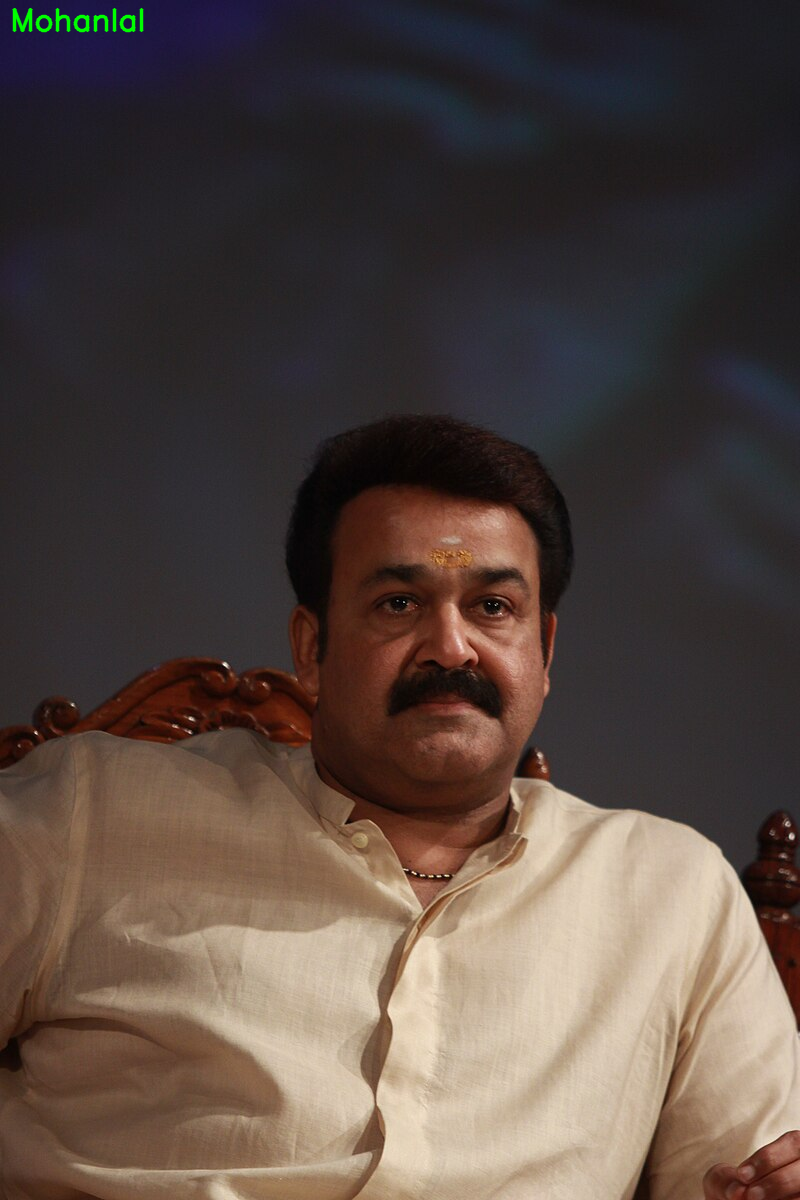

In [ ]:
import cv2
import numpy as np
import tensorflow as tf

from google.colab.patches import cv2_imshow
model = tf.keras.models.load_model('face.h5')
labels = {0: 'Mamootty', 1: 'Mohanlal'}
def detect_faces(frame):
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized_frame = cv2.resize(rgb_frame, (100, 100))
    resized_frame = np.expand_dims(resized_frame, axis=0)
    pred = model.predict(resized_frame)
    label = labels[pred.argmax()]
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    return frame
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
image_path = '/content/mohanlal.JPG'
frame = cv2.imread(image_path)
if frame is None:
    print("Error: Unable to load image.")
    exit()
output_image = detect_faces(frame)
cv2_imshow(output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
"""implement live camera capture, followed by image classification to predict whether the captured image contains Mohanlal or Mammootty."""

import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the trained model (update path as needed)
model_path = "face.h5"  # Ensure the model is saved and accessible
model = load_model(model_path)

# Define labels
labels = {0: 'Mammootty', 1: 'Mohanlal'}

def preprocess_image(img):
    img = cv2.resize(img, (224, 224))  # Resize to match model input
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Initialize webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame
    processed_frame = preprocess_image(frame)

    # Predict using the model
    prediction = model.predict(processed_frame)
    predicted_class = np.argmax(prediction)
    label = labels[predicted_class]

    # Display prediction on frame
    cv2.putText(frame, label, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Live Camera - Prediction', frame)

    # Exit when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()
